In [1]:
#mount với drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [4]:

batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/Money'


In [5]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 179 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [6]:
train_dataset.classes
print(train_dataset.class_indices)

{'1000': 0, '10000': 1, '100000': 2, '200': 3, '2000': 4, '20000': 5, '200000': 6, '500': 7, '5000': 8, '50000': 9, '500000': 10}


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

In [14]:
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
179/179 [==============================] - 5s 23ms/step - loss: 0.3081 - accuracy: 0.2961 - val_loss: 0.3926 - val_accuracy: 0.0909
Epoch 2/20
179/179 [==============================] - 4s 22ms/step - loss: 0.1664 - accuracy: 0.7095 - val_loss: 0.3157 - val_accuracy: 0.2045
Epoch 3/20
179/179 [==============================] - 4s 22ms/step - loss: 0.0956 - accuracy: 0.8771 - val_loss: 0.2811 - val_accuracy: 0.3409
Epoch 4/20
179/179 [==============================] - 4s 22ms/step - loss: 0.0630 - accuracy: 0.9609 - val_loss: 0.3340 - val_accuracy: 0.3182
Epoch 5/20
179/179 [==============================] - 4s 22ms/step - loss: 0.0447 - accuracy: 0.9777 - val_loss: 0.3461 - val_accuracy: 0.2955
Epoch 6/20
179/179 [==============================] - 4s 22ms/step - loss: 0.0332 - accuracy: 0.9832 - val_loss: 0.3223 - val_accuracy: 0.4091
Epoch 7/20
179/179 [==============================] - 4s 22ms/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.3451 - val_accuracy: 0.2500

Loại tiền 5000 dong 


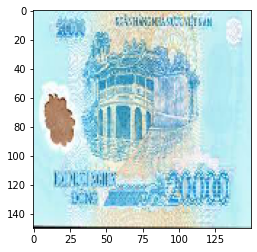

In [17]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/Money/20000.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1000 dong ")
if(test==1):
    print("Loại tiền 10000 dong")
if(test ==2):
    print("Loại tiền 100000 dong")
if(test==3):
    print("Loại tiền 200 dong")
if(test ==4):
    print("Loại tiền 2000 dong")
if(test==5):
    print("Loại tiền 20000 dong")
if(test ==6):
    print("Loại tiền 200000 dong")
if(test==7):
    print("Loại tiền 500 dong")
if(test ==8):
    print("Loại tiền 5000 dong ")
if(test==9):
    print("Loại tiền 50000 dong")
if(test==10):
    print("Loại tiền 500000 dong")

Loại tiền 5000 dong 


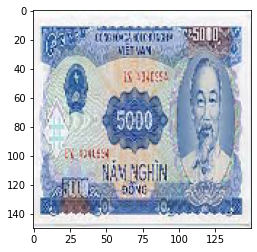

In [18]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/Money/5000.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1000 dong ")
if(test==1):
    print("Loại tiền 10000 dong")
if(test ==2):
    print("Loại tiền 100000 dong")
if(test==3):
    print("Loại tiền 200 dong")
if(test ==4):
    print("Loại tiền 2000 dong")
if(test==5):
    print("Loại tiền 20000 dong")
if(test ==6):
    print("Loại tiền 200000 dong")
if(test==7):
    print("Loại tiền 500 dong")
if(test ==8):
    print("Loại tiền 5000 dong ")
if(test==9):
    print("Loại tiền 50000 dong")
if(test==10):
    print("Loại tiền 500000 dong")

Loại tiền 10000 dong


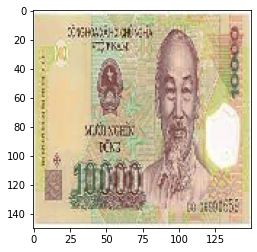

In [19]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/Money/10000.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1000 dong ")
if(test==1):
    print("Loại tiền 10000 dong")
if(test ==2):
    print("Loại tiền 100000 dong")
if(test==3):
    print("Loại tiền 200 dong")
if(test ==4):
    print("Loại tiền 2000 dong")
if(test==5):
    print("Loại tiền 20000 dong")
if(test ==6):
    print("Loại tiền 200000 dong")
if(test==7):
    print("Loại tiền 500 dong")
if(test ==8):
    print("Loại tiền 5000 dong ")
if(test==9):
    print("Loại tiền 50000 dong")
if(test==10):
    print("Loại tiền 500000 dong")

Loại tiền 500000 dong


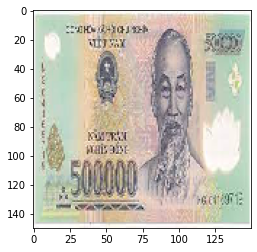

In [21]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/Money/500000.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1000 dong ")
if(test==1):
    print("Loại tiền 10000 dong")
if(test ==2):
    print("Loại tiền 100000 dong")
if(test==3):
    print("Loại tiền 200 dong")
if(test ==4):
    print("Loại tiền 2000 dong")
if(test==5):
    print("Loại tiền 20000 dong")
if(test ==6):
    print("Loại tiền 200000 dong")
if(test==7):
    print("Loại tiền 500 dong")
if(test ==8):
    print("Loại tiền 5000 dong ")
if(test==9):
    print("Loại tiền 50000 dong")
if(test==10):
    print("Loại tiền 500000 dong")